In [1]:
!pip install pydotplus

In [0]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [4]:
from google.colab import files

files.upload()

Saving car_data.csv to car_data.csv


{'car_data.csv': b'buying,maintainace,doors,persons,luggage_space,safety,rating    \r\nvhigh,vhigh,2,2,small,low,unacc\nvhigh,vhigh,2,2,small,med,unacc\nvhigh,vhigh,2,2,small,high,unacc\nvhigh,vhigh,2,2,med,low,unacc\nvhigh,vhigh,2,2,med,med,unacc\nvhigh,vhigh,2,2,med,high,unacc\nvhigh,vhigh,2,2,big,low,unacc\nvhigh,vhigh,2,2,big,med,unacc\nvhigh,vhigh,2,2,big,high,unacc\nvhigh,vhigh,2,4,small,low,unacc\nvhigh,vhigh,2,4,small,med,unacc\nvhigh,vhigh,2,4,small,high,unacc\nvhigh,vhigh,2,4,med,low,unacc\nvhigh,vhigh,2,4,med,med,unacc\nvhigh,vhigh,2,4,med,high,unacc\nvhigh,vhigh,2,4,big,low,unacc\nvhigh,vhigh,2,4,big,med,unacc\nvhigh,vhigh,2,4,big,high,unacc\nvhigh,vhigh,2,more,small,low,unacc\nvhigh,vhigh,2,more,small,med,unacc\nvhigh,vhigh,2,more,small,high,unacc\nvhigh,vhigh,2,more,med,low,unacc\nvhigh,vhigh,2,more,med,med,unacc\nvhigh,vhigh,2,more,med,high,unacc\nvhigh,vhigh,2,more,big,low,unacc\nvhigh,vhigh,2,more,big,med,unacc\nvhigh,vhigh,2,more,big,high,unacc\nvhigh,vhigh,3,2,small,

In [0]:
data = pd.read_csv('car_data.csv')

In [7]:
data.head()

,buying,maintainace,doors,persons,luggage_space,safety,rating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


TypeError: ignored

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null object
maintainace      1728 non-null object
doors            1728 non-null object
persons          1728 non-null object
luggage_space    1728 non-null object
safety           1728 non-null object
rating           1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [0]:
d=pd.get_dummies(data.iloc[:,:6])

In [15]:
d.columns

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maintainace_high', 'maintainace_low', 'maintainace_med',
       'maintainace_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more',
       'persons_2', 'persons_4', 'persons_more', 'luggage_space_big',
       'luggage_space_med', 'luggage_space_small', 'safety_high', 'safety_low',
       'safety_med'],
      dtype='object')

In [0]:
model=DecisionTreeClassifier()

In [0]:
xtrain=d.iloc[:1200,:]

In [0]:
ytrain=d.iloc[:1200,-1]

In [0]:
xtest=d.iloc[1200:,:]
y_test=d.iloc[1200:,-1]

In [34]:
model.fit(xtrain,ytrain)
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1.])

In [0]:
c=model.predict(xtest)

In [0]:
import numpy as np

In [42]:
(c==y_test).mean()

1.0

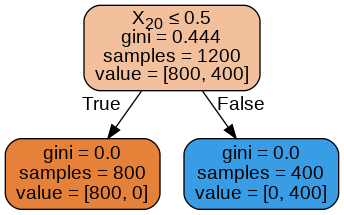

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())